In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing data
dataset_path = 'aerofit_treadmill_data.csv'
aerofit_df = pd.read_csv(dataset_path)

In [4]:
# Reading dataframe
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
# Shape of the dataframe
aerofit_df.shape

(180, 9)

In [7]:
# Name of each column in the dataframe
aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [8]:
# Data type of each column in the dataframe
aerofit_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [10]:
# Convert object to category datatype since each such column only includes 1 set of predetermined labels
aerofit_df['Product'] = aerofit_df['Product'].astype('category')
aerofit_df['Gender'] = aerofit_df['Gender'].astype('category')
aerofit_df['MaritalStatus'] = aerofit_df['MaritalStatus'].astype('category')

In [11]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [14]:
# Check distribution skewness of numerical variables
aerofit_df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

## Statistical Summary ##

In [16]:
aerofit_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Observations: ####
- There are 3 unique products in the dataset.
- KP281 is the most popular type of treadmill purchased.
- 75% of customers are between 18 and 33 years old.
- Male customers are dominant, making up 104 out of 180 customers. 
- Most customers have 16 years of education.
- Partnered customers are dominant, making up 107 out of 180 customers. 
- Most customers expected to use the treadmill 3 times per week.
- Most customers rated themselves as fairly in shape.
- Standard deviation of income and miles variable is fairly rough, indicating its variation & possible outliers.
- Most customers (50%) had income from 44k to 60k anually.

In [17]:
# Missing value detection
aerofit_df.isna().sum() # No missing value detected in the dataframe

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
# Duplicate value detection
aerofit_df.duplicated(subset=None, keep='first').sum() # No duplicated value detected in the dataframe

0

## Non-Graphical Analysis ##

### Value Counts ###

In [19]:
aerofit_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [20]:
aerofit_df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [21]:
aerofit_df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [29]:
aerofit_df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

### Unique Attributes ###

In [23]:
aerofit_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [25]:
aerofit_df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [26]:
aerofit_df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [27]:
aerofit_df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [28]:
aerofit_df['Fitness'].unique()

array([4, 3, 2, 1, 5])

## Graphical Analysis
### Univariate Analysis - Numerical Variables

In [30]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Miles', ylabel='Count'>

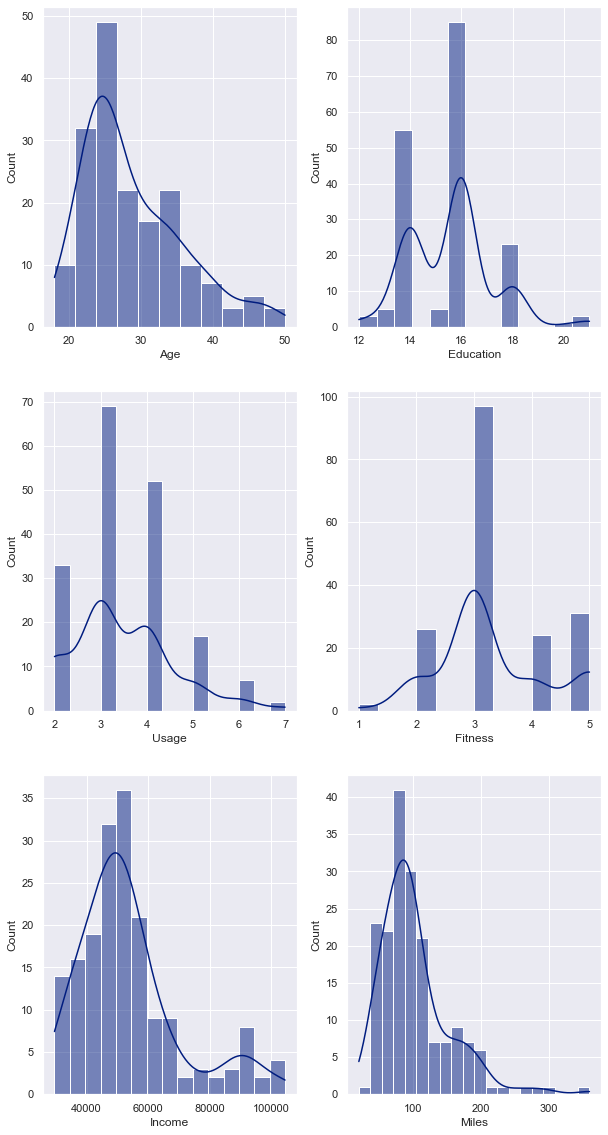

In [44]:
sns.set_theme(style='darkgrid', palette='dark')
# Distribution plot
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(10,20))
sns.histplot(aerofit_df['Age'], kde=True, ax=axis[0,0])
sns.histplot(aerofit_df['Education'], kde=True, ax=axis[0,1])
sns.histplot(aerofit_df['Usage'], kde=True, ax=axis[1,0])
sns.histplot(aerofit_df['Fitness'], kde=True, ax=axis[1,1])
sns.histplot(aerofit_df['Income'], kde=True, ax=axis[2,0])
sns.histplot(aerofit_df['Miles'], kde=True, ax=axis[2,1])

- Most customers are between 20 and 30 years of age (mostly young people who are likely to be more concerned about health).
- The highest number of customers reported to have 16 years of education, followed by 14 years.
- Majority of customers earned between 40k to 60k each year.

<AxesSubplot:xlabel='Miles', ylabel='count'>

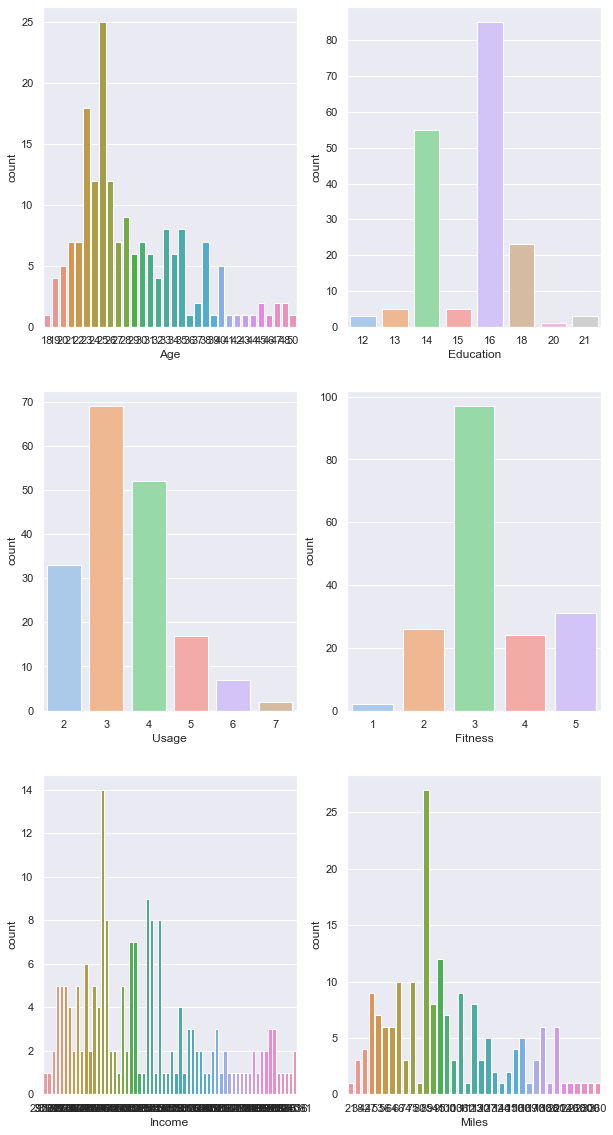

In [50]:
# tbh not very practical for numerical variables with a lot of variations -> don't use
sns.set_theme(style='darkgrid', palette='pastel')
# Count plot
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(10,20))
sns.countplot(data=aerofit_df, x='Age', ax=axis[0,0])
sns.countplot(data=aerofit_df, x='Education', ax=axis[0,1])
sns.countplot(data=aerofit_df, x='Usage', ax=axis[1,0])
sns.countplot(data=aerofit_df, x='Fitness', ax=axis[1,1])
sns.countplot(data=aerofit_df, x='Income', ax=axis[2,0])
sns.countplot(data=aerofit_df, x='Miles', ax=axis[2,1])

<AxesSubplot:xlabel='Miles'>

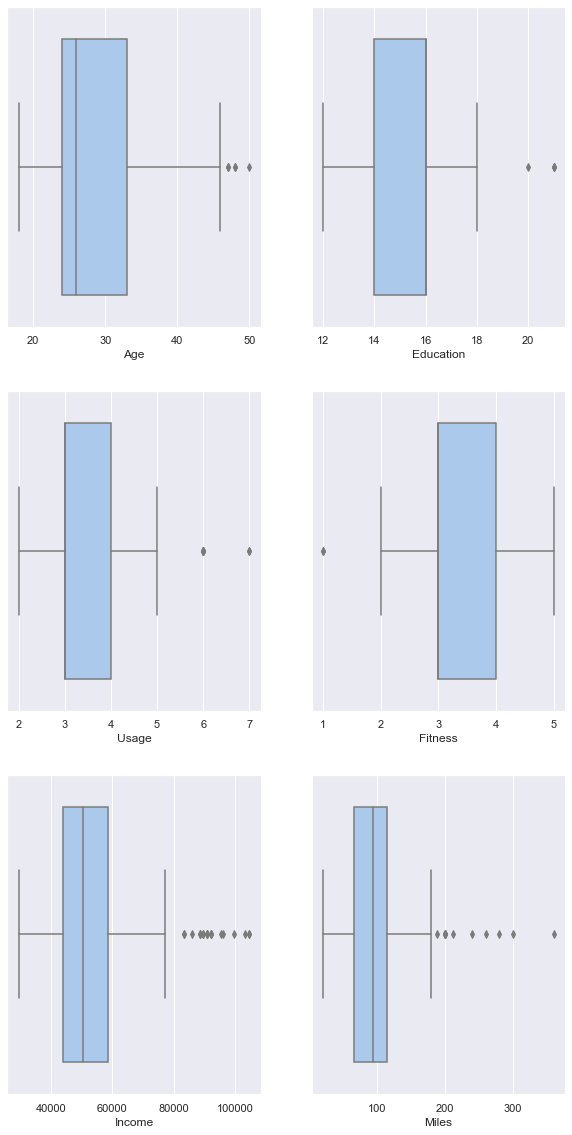

In [51]:
# Box plot
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(10,20))
sns.boxplot(data=aerofit_df, x='Age', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x='Education', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x='Usage', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x='Fitness', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x='Income', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x='Miles', ax=axis[2,1])

- There are a noticeable number of outliers in Income and Miles variables, indicating people who earned more than 80k anually and expected to run more than 200 miles pw on treadmills.
- Other variables have very few outliers.

### Univariate Analysis - Categorical Variables

Text(0.5, 1.0, 'Marital Status - Count')

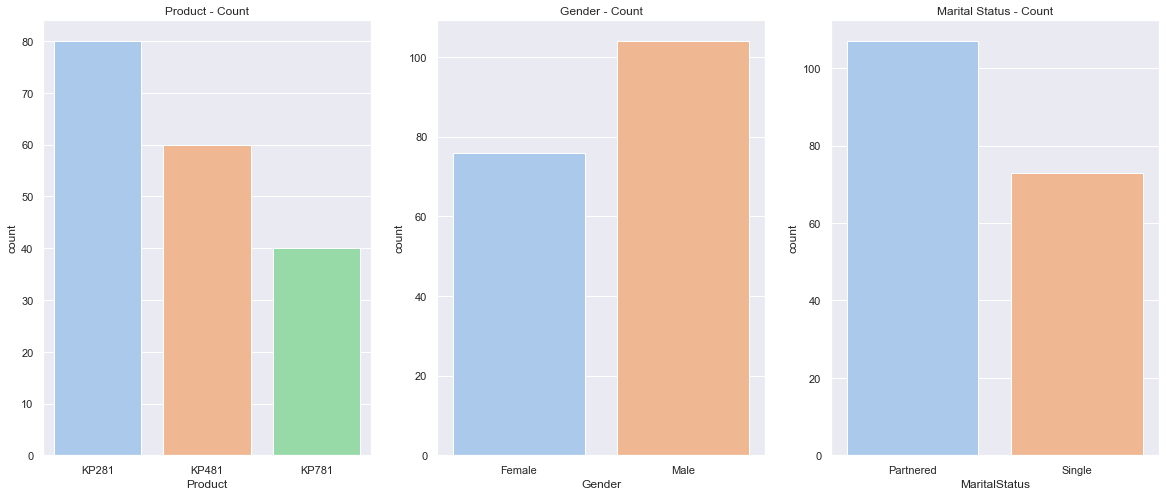

In [60]:
fig, axis = plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.countplot(data=aerofit_df, x='Product', ax=axis[0])
sns.countplot(data=aerofit_df, x='Gender', ax=axis[1])
sns.countplot(data=aerofit_df, x='MaritalStatus', ax=axis[2])
axis[0].set_title('Product - Count')
axis[1].set_title('Gender - Count')
axis[2].set_title('Marital Status - Count')

- KP281 was the most viral/frequent/best-selling product with 80 treadmills sold, followed by KP481 with 60 sold.
- Male customers were more likely to make a purchase than female customers.
- Partnered customers were more likely to make a purchase than single customers.

### Bivariate Analysis

Text(0.5, 1.0, 'Marital Status - Count')

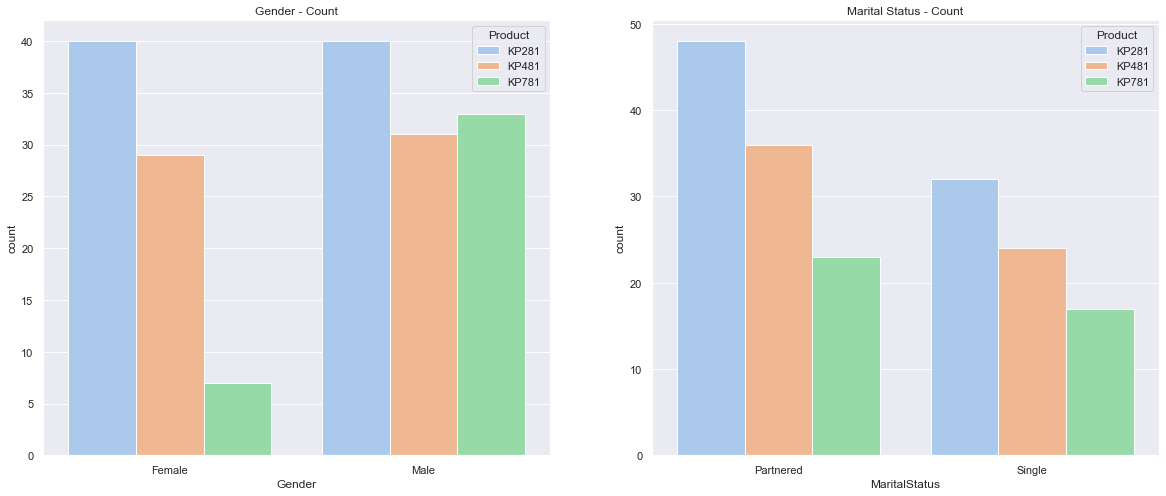

In [61]:
# Count plot for categorical variables
fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
sns.countplot(data=aerofit_df, x='Gender', hue='Product', ax=axis[0])
sns.countplot(data=aerofit_df, x='MaritalStatus', hue='Product', ax=axis[1])
axis[0].set_title('Gender - Count')
axis[1].set_title('Marital Status - Count')

- Female customers are more likely to buy KP281, while Male customers are more likely to buy KP781.
- Marital Status are more likely to purchase all types of treadmills.

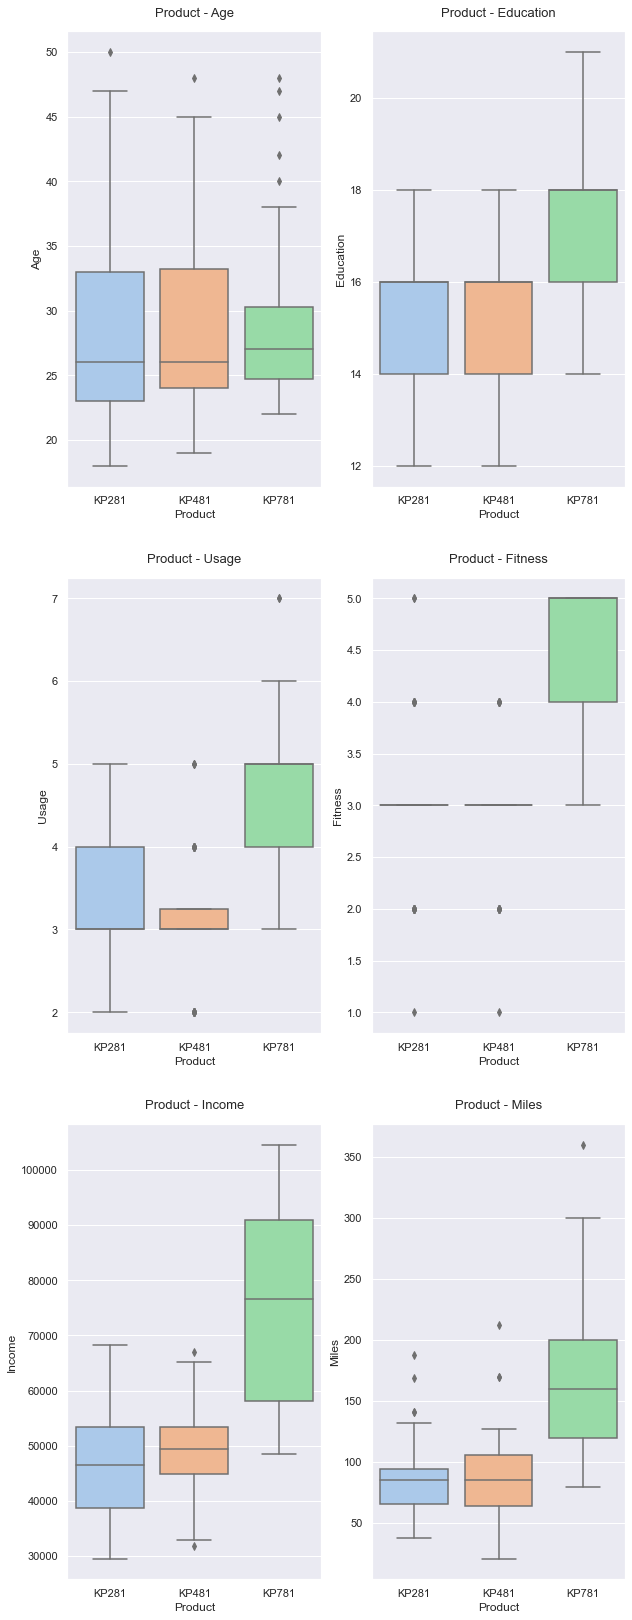

In [76]:
numerical_var = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
count = 0
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,20))
fig.subplots_adjust(top=1.2)
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit_df, x='Product', y=numerical_var[count], ax=axis[i,j])
        axis[i,j].set_title(f'Product - {numerical_var[count]}', pad=15, fontsize=13)
        count += 1

Age:
- People who purchases KP281 and KP481 have the same median age.
- People between 25-30 are more likely to buy KP781 than other age groups.

Education:
- People who have more than 16 years of educations are more likely / have more chances to purchase KP781
- People who have less than 16 years of educations have equal chances to buy KP281 or KP481.

Usage & Miles:
- People who expect to use the product more frequent (> 4 times pw) to run longer miles (> 125 miles pw) tend to buy KP781, while those who expect to run on the treadmill 3-4 times pw decided to buy KP281 and KP481.

Fitness:
- People who rated themselves between fairly fit to perfectly fit are more likely to purchase KP781.

Income:
- People with lower than 48k income tend to opt for KP281, while those with higher than 59k income tend to opt fore KP781.

## Multivariate Analysis
### Main factor: Age (bins), Gender, Marital Status, Income (bins)

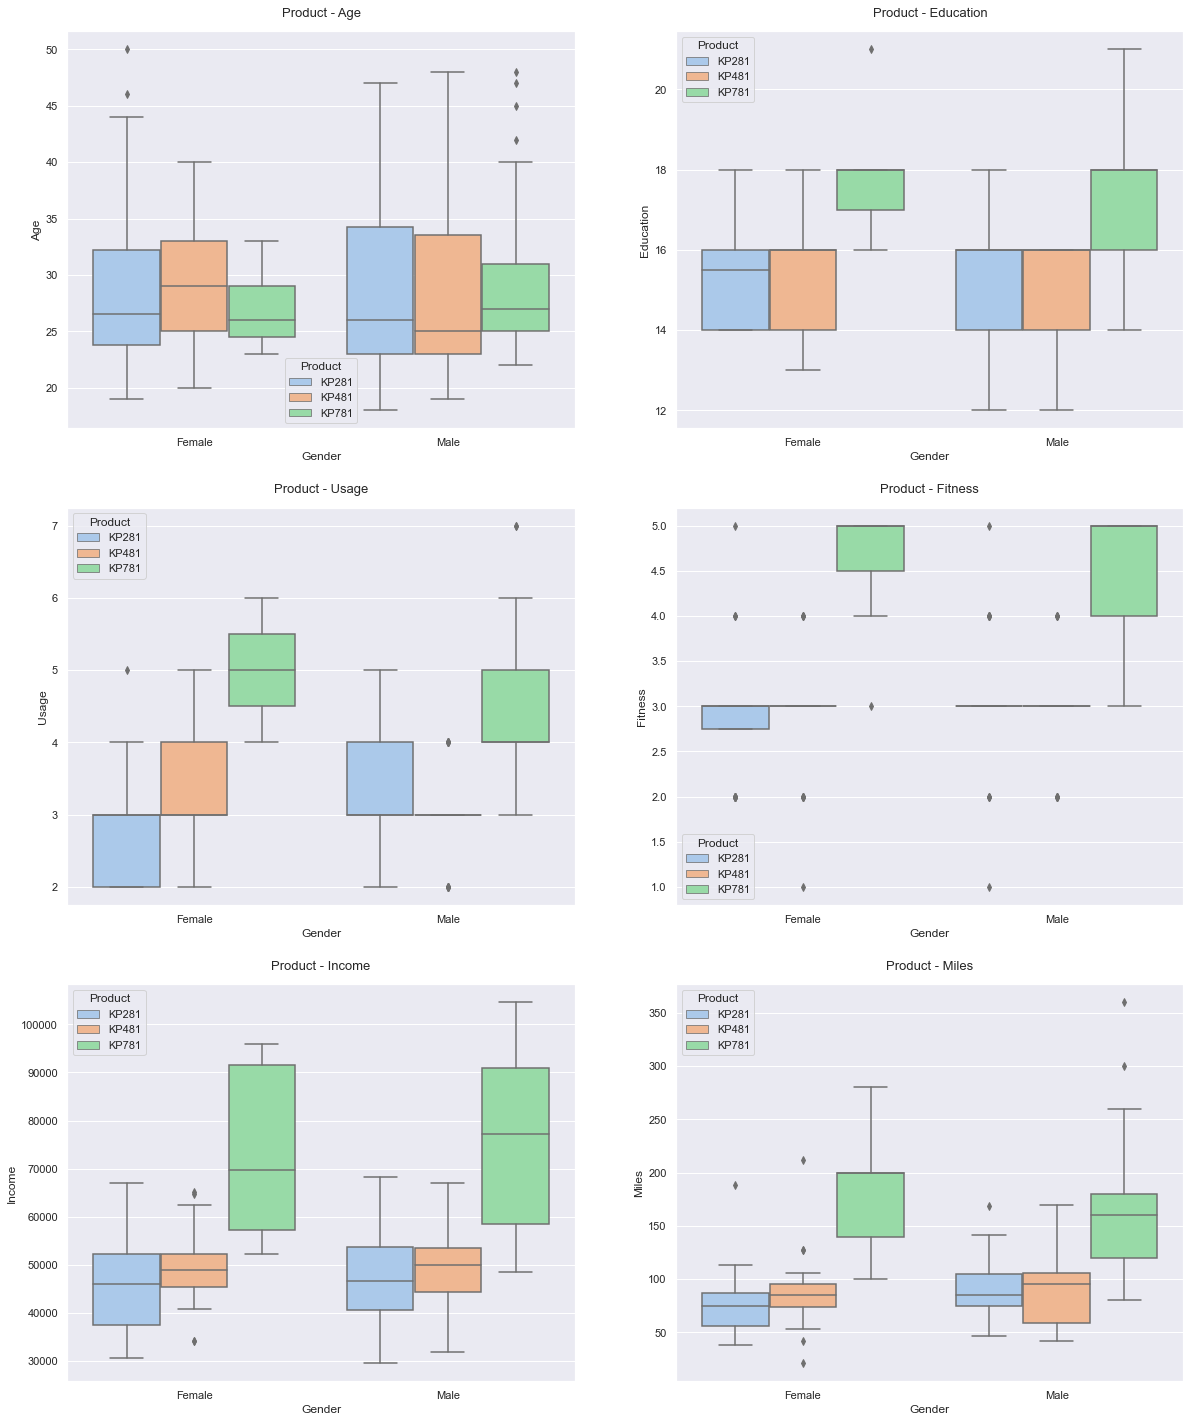

In [81]:
# Gender
numerical_var = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
count = 0
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
fig.subplots_adjust(top=2)
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit_df, x='Gender', y=numerical_var[count], hue='Product', ax=axis[i,j])
        axis[i,j].set_title(f'Product - {numerical_var[count]}', pad=15, fontsize=13)
        count += 1

- Females who planned to use the treadmill 3-4 times pw are more likely to buy KP481 model.

## Correlation Analysis

In [82]:
aerofit_df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [83]:
aerofit_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


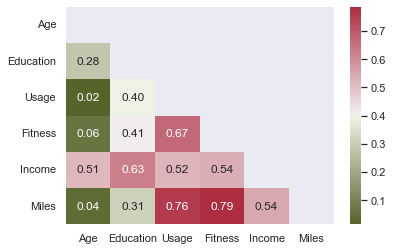

In [95]:
fig, ax = plt.subplots()
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
sns.set(color_codes = True)
matrix = np.triu(aerofit_df.copy().corr())
sns.heatmap(aerofit_df.corr(), ax=ax, annot=True, fmt='0.2f', mask=matrix, cmap=cmap)
plt.show()

- (Miles & Usage) and (Miles & Fitness) are highly correlated, showing that if a customer's fitness level is high, they expect to use the treadmills more often to run more miles.
- There is a low correlation between Age and Fitness, suggesting that age should not stop people from achieving high fitness level.

## Marginal & Conditional Probabilities

In [127]:
df = aerofit_df[['Product','Gender','MaritalStatus']].melt()
(df.groupby(['variable','value'])[['value']].count()/len(aerofit_df)).mul(100).round(3).astype('str')+'%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [182]:
aerofit_df1 = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']], margins=True)
aerofit_df1

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [139]:
aerofit_df1['Female']['KP281'] / aerofit_df1['Female']['All']

0.5263157894736842

In [150]:
female_percent = aerofit_df1.loc['All','Female'] / aerofit_df1.loc['All','All']
male_percent = aerofit_df1.loc['All','Male'] / aerofit_df1.loc['All','All']
print(f"P(Female): {female_percent:.2f}")
print(f"P(Male): {male_percent:.2f}")

P(Female): 0.42
P(Male): 0.58


In [154]:
p2_given_female =  aerofit_df1.loc['KP281','Female'] / aerofit_df1.loc['All','Female']
p2_given_female

0.5263157894736842

In [184]:
# Gender conditional probability
def cal_conditional_probability_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    aerofit_df1 = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']], margins=True)
    p_281 = aerofit_df1.loc['KP281', gender] / aerofit_df1.loc['All', gender]
    p_481 = aerofit_df1.loc['KP481', gender] / aerofit_df1.loc['All', gender]
    p_781 = aerofit_df1.loc['KP781', gender] / aerofit_df1.loc['All', gender]
    
    if print_marginal:
        female_percent = aerofit_df1.loc['All','Female'] / aerofit_df1.loc['All','All']
        male_percent = aerofit_df1.loc['All','Male'] / aerofit_df1.loc['All','All']
        print(f"P(Female): {female_percent:.2f}")
        print(f"P(Male): {male_percent:.2f}\n")
    
    print(f"P(KP281|{gender}): {p_281:.2f}")
    print(f"P(KP481|{gender}): {p_481:.2f}")
    print(f"P(KP781|{gender}): {p_781:.2f}\n")
    
cal_conditional_probability_gender("Male", True)
cal_conditional_probability_gender("Female")


P(Female): 0.42
P(Male): 0.58

P(KP281|Male): 0.38
P(KP481|Male): 0.30
P(KP781|Male): 0.32

P(KP281|Female): 0.53
P(KP481|Female): 0.38
P(KP781|Female): 0.09



In [186]:
pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [197]:
# Marital Status conditional probability
def cal_conditional_probability_marital(status, print_marginal=False):
    if status != "Single" and status != "Partnered":
        return "Invalid marital status value."
    aerofit_df_status = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']], margins=True)
    p_281 = aerofit_df_status.loc['KP281', status] / aerofit_df_status.loc['All', status]
    p_481 = aerofit_df_status.loc['KP481', status] / aerofit_df_status.loc['All', status]
    p_781 = aerofit_df_status.loc['KP781', status] / aerofit_df_status.loc['All', status]
    
    if print_marginal:
        single_percent = aerofit_df_status.loc['All','Single'] / aerofit_df_status.loc['All','All']
        partnered_percent = aerofit_df_status.loc['All','Partnered'] / aerofit_df_status.loc['All','All']
        print(f"P(Single): {single_percent:.2f}")
        print(f"P(Partnered): {partnered_percent:.2f}\n")
    
    print(f"P(KP281|{status}): {p_281:.2f}")
    print(f"P(KP481|{status}): {p_481:.2f}")
    print(f"P(KP781|{status}): {p_781:.2f}\n")
    
cal_conditional_probability_marital("Single", True)
cal_conditional_probability_marital("Partnered")


P(Single): 0.41
P(Partnered): 0.59

P(KP281|Single): 0.44
P(KP481|Single): 0.33
P(KP781|Single): 0.23

P(KP281|Partnered): 0.45
P(KP481|Partnered): 0.34
P(KP781|Partnered): 0.21



### Customer segmentation

In [167]:
# Age groups
age_bins = [0, 20, 30, 40, 60]
age_labels = ["Teens", "20s", "30s", "Above 40s"]
aerofit_df2 = aerofit_df.copy()
aerofit_df2['Age Group'] = pd.cut(aerofit_df['Age'], age_bins)
aerofit_df2['Age Category'] = pd.cut(aerofit_df['Age'], age_bins, labels=age_labels)
aerofit_df2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group,Age Category
0,KP281,18,Male,14,Single,3,4,29562,112,"(0, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(0, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(0, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(0, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(0, 20]",Teens
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s


In [171]:
age_tab = pd.crosstab(index=aerofit_df2['Product'], columns=[aerofit_df2['Age Category']], margins=True)
age_tab

Age Category,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


<AxesSubplot:xlabel='Income'>

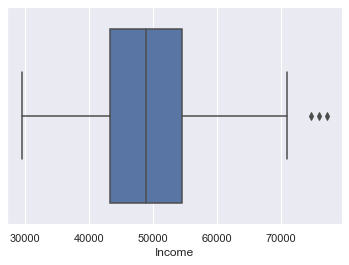

In [181]:
# Handle outliers by removing 
aerofit_df3 = aerofit_df.copy()
Q3 = aerofit_df3['Income'].quantile(0.75)
Q1 = aerofit_df3['Income'].quantile(0.25)
IQR = Q3 - Q1

aerofit_df3 = aerofit_df3[(aerofit_df3['Income'] > (Q1 - 1.5*IQR)) & (aerofit_df3['Income'] < (Q3 + 1.5*IQR))]
sns.boxplot(data=aerofit_df3, x='Income')